<a href="https://colab.research.google.com/github/lucas-ye/IA/blob/main/ACD_T11_Kmedias_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right"></a>
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->

<h1 align=left><font size = 6, style="color:rgb(200,0,0)">Lab Kmeans </font></h1>
<hr>

# **Kmédias**




# Caso: **Segmentando Clientes de um Mall** 

Aqui você encontrará dados de 200 clientes de uma loja de Shopping com dados de idade, renda, sexo e score de gastos na loja. Você seguimentará esses clientes tentando obter e caracterizar grupos distintos de clientes para poder tomar decisões sobre como atuar sobre esses grupos (campanhas, ofertas de produtos etc.).

Os dados estão na URL: 'http://meusite.mackenzie.br/rogerio/TIC/Mall_Customers.csv'




# Exercício. Imports

Acrescente ao import básico das bibliotecas o import do `Kmeans` e do `StandardScaler` que será empregado para normalizar os valores. 

In [1]:
# imports

import pandas                  as pd
import numpy                   as np
import matplotlib.pyplot       as plt
import warnings
import os
import seaborn as sns
warnings.filterwarnings("ignore") 

# acrescente seus imports aqui


# Exercício. Acesse e explore os dados







In [3]:
# Seu código
df= pd.read_csv('http://meusite.mackenzie.br/rogerio/TIC/Mall_Customers.csv')
df.head()



,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## Exercício. Definindo a entrada `X`

1. As entradas `X` do `kmeans` precisam ser numéricas pois ele emprega a média das distâncias dos elementos. Converta o atributo `Gender` numérico, com 'Male' = 1 e 'Female' = 0.

2. Além disso note que existe um atributo nos dados que não faz sentido ser incluído no modelo. Exclua esse atributo da entrada `X` para o treinamento.

In [11]:
# Seu código
df['Gender'] = df['Gender'].replace("Male", 1)
df['Gender'] = df['Gender'].replace("Female", 0)
df = df.drop(columns = ['CustomerID'])
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


## Exercício. Normalize os dados `Scaling`

O `kmeans` emprega distâncias e, portanto, é sensível à escala dos dados. Normalize os dados de `X` com o método `StandardScaler()` ou a função `scale( )` (solução mais simples)\*. 

\* nota: o método precisa ser empregado sempre que quisermos 'persistir' ou empregar novamente a normalização aplicada para novos dados preservando essa transformação. Neste caso específico, não teremos necessidade de preservar essa transformação e podemos então apenas aplicar a função `scale()` que se mostra bastante mais simples.

In [12]:
# Seu código 
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(df)
X = scaler.transform(df)
X[0:10]

array([[ 1.12815215, -1.42456879, -1.73899919, -0.43480148],
       [ 1.12815215, -1.28103541, -1.73899919,  1.19570407],
       [-0.88640526, -1.3528021 , -1.70082976, -1.71591298],
       [-0.88640526, -1.13750203, -1.70082976,  1.04041783],
       [-0.88640526, -0.56336851, -1.66266033, -0.39597992],
       [-0.88640526, -1.20926872, -1.66266033,  1.00159627],
       [-0.88640526, -0.27630176, -1.62449091, -1.71591298],
       [-0.88640526, -1.13750203, -1.62449091,  1.70038436],
       [ 1.12815215,  1.80493225, -1.58632148, -1.83237767],
       [-0.88640526, -0.6351352 , -1.58632148,  0.84631002]])

Ótimo, seus dados agora devem aparecer todos com média 0 e desvio padrão 1.

In [ ]:
# Seu código

## Exercício. Determine o número *ideal* de Clusters

O método da inércia ou regra do cotovelo, permite determinar o melhor número de cluster. Determine o número de cluster executando o código apresentado na teoria. Ele não precisa ser modificado se os dados de entradas estão corretamente em `X`. 

\*nota: existem outras métricas e critérios para decidir o número de Clusters. Algumas dependem do problema em questão (veja o problema de separar os grupos por idade para dois monitores em uma visita). Você ainda pode verificar o tamanho dos grupos evitando grupos muito grandes ou muito pequenos. E ainda existem métricas estatísticas como o `Silhouette`. Para os nossos propósitos, entretanto, será suficiente empregarmos a regra do cotovelo com base na inércia dos grupos.

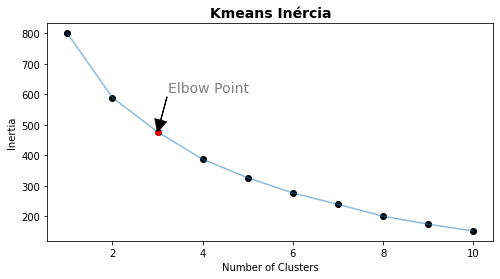

In [13]:
from sklearn.cluster import KMeans
def inercia(X=X, kmin=1, kmax=10):
  inertia = []
  for n in range(kmin , kmax+1):
      clf = KMeans(n_clusters = n , random_state= 1984)
      clf.fit(X)
      inertia.append(clf.inertia_)
      
  plt.figure(figsize = (8, 4))
  plt.plot(np.arange(1 , 11) , inertia , 'ko')
  plt.plot(np.arange(1 , 11) , inertia , '-' , alpha = 0.5)
  plt.xlabel('Number of Clusters') , plt.ylabel('Inertia')
  plt.title('Kmeans Inércia', fontsize=14, weight='bold')
  return inertia

inertia = inercia(X,1,10)
# adicionado depois... ;-)
plt.plot(3 , inertia[2] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (3 , inertia[2]), 
            xytext=(10, 40), fontsize=14,
            textcoords='offset points', 
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()   

In [18]:
from sklearn import metrics
for n_clusters in range(2,11):
  clf = KMeans(n_clusters = n_clusters , random_state= 123)  
  clf.fit(X)
  labels = clf.labels_
  print('Silhueta média para', n_clusters , 'clusters: ', np.round( metrics.silhouette_score(X, labels, metric='euclidean'),3))

Silhueta média para 2 clusters:  0.252
Silhueta média para 3 clusters:  0.262
Silhueta média para 4 clusters:  0.302
Silhueta média para 5 clusters:  0.317
Silhueta média para 6 clusters:  0.335
Silhueta média para 7 clusters:  0.363
Silhueta média para 8 clusters:  0.39
Silhueta média para 9 clusters:  0.402
Silhueta média para 10 clusters:  0.421


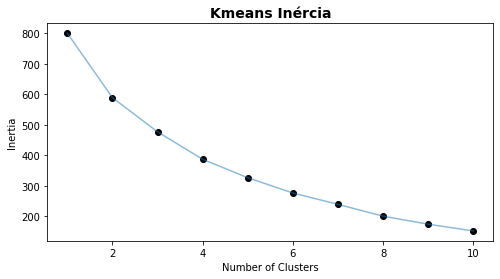

In [15]:
# Seu código

inertia = inercia(X,1,10)
plt.plot(2 , inertia[1] , 'P', alpha = 1, color = 'red')
plt.annotate('Elbow Point', (2 , inertia[1]), 
            xytext=(10, 40), fontsize=14,
            textcoords='offset points', 
            color='grey',arrowprops=dict(facecolor='black',width=0.1))

plt.show()  

## Exercício. Segmentando os Grupos

Determinado o número (na dúvida o melhor número é o 3) vamos segmentar nossos clientes em 3 grupos. Não deixe de empregar o `random_state= 123` na função `KMeans` para obter as mesmas respostas.

In [19]:
# Seu código
# Configura e instancia o estimador 
clf = KMeans(n_clusters = 3 , random_state= 123)  # seed, para a reprodutibilidade dos resultados

# Ajusta o estimador aos dados
clf.fit(X) # somente os atributos Murder e UrbanPop

# Obtém os resultados do modelo
labels = clf.labels_
centroids = clf.cluster_centers_

print(labels)
print(centroids)

[0 0 1 0 1 0 1 0 2 0 2 0 1 0 2 0 1 0 2 0 2 0 1 0 1 0 1 0 1 0 2 0 2 0 1 0 1
 0 1 0 1 0 2 0 1 0 1 1 1 1 1 0 1 2 1 2 1 2 1 2 2 0 1 1 2 0 1 1 0 1 2 1 1 1
 2 0 1 2 0 1 2 2 2 1 0 2 1 0 1 1 1 0 2 1 1 0 1 1 2 0 1 1 2 0 2 1 1 2 2 2 2
 0 1 0 0 0 1 1 1 1 0 1 1 0 1 0 2 0 2 0 2 0 1 0 2 0 1 0 2 0 1 0 1 0 2 0 2 0
 1 0 2 0 1 0 1 0 2 0 2 0 1 0 2 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 2 0 1 0 2 0 1
 0 1 0 1 0 1 0 2 0 1 0 1 0 2 0]
[[ 0.09569148 -0.76790358  0.05687245  0.9389965 ]
 [-0.88640526  0.35241488 -0.10846569 -0.50971069]
 [ 1.12815215  0.74307816  0.06431159 -0.79449512]]


## Exercício. Identifique o grupo de alguns clientes

Adicione um atributo `cluster` ao dataframe atribuindo os grupos `labels` obtidos acima para facilitar a identificação do grupo de cada cliente.

In [20]:
# seu código aqui
df['Cluster'] = labels
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,19,15,39,0
1,1,21,15,81,0
2,0,20,16,6,1
3,0,23,16,77,0
4,0,31,17,40,1
5,0,22,17,76,0
6,0,35,18,6,1
7,0,23,18,94,0
8,1,64,19,3,2
9,0,30,19,72,0


A que grupos pertencem os clientes de ID 12, 34, 99?

In [23]:
# seu código aqui
df.loc[[11, 33, 98]]


,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
11,0,35,19,99,0
33,1,18,33,92,0
98,1,48,61,42,2


## Exercício. Caracterizando os grupos

Mas afinal, o que são esses grupos de clientes 0, 1, 2? O que pode estar diferenciando cada grupo?

Uma abordagem é olhar as médias dos valores desses grupos e observar no que um cliente médio de cada grupo se diferencia dos demais.

Empregue o modelo da teoria para exibir as médias dos valores de cada grupo e tente identificar que grupos de clientes estão sendo formados.

In [24]:
# Seu código
df.groupby('Cluster').mean()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Cluster,,,,
0,0.4875,28.150000,62.050000,74.387500
1,0.0000,43.760563,57.718310,37.070423
2,1.0000,49.204082,62.244898,29.734694


## Exercícios. Utilizando os grupos

* Cenário **A**. A loja, em uma campanha de marketing, quer então presentear aluguns clientes com algo score com produtos para cabelos brancos. Para qual grupo/grupos ela deveria enviar os produtos? 

* Cenário **B**. Ela ainda quer fazer uma oferta de produtos de celulares modernos e de luxo. Para qual grupo/grupos ela deveria ofertar esses produtos para maximizar sua chance de vendas?
